# Import

In [6]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor, rdMolDescriptors, rdFMCS

from tqdm import tqdm

from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.SimDivFilters.rdSimDivPickers import HierarchicalClusterPicker, ClusterMethod


from IPython.core.display import display, HTML, Math
IPythonConsole.drawOptions.addAtomIndices = True

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mols2grid

import time
rdDepictor.SetPreferCoordGen(True)

import rdkit
%pylab inline
print(rdkit.__version__)

cmap = plt.get_cmap("tab10")


Populating the interactive namespace from numpy and matplotlib
2020.09.1


# Display Picks

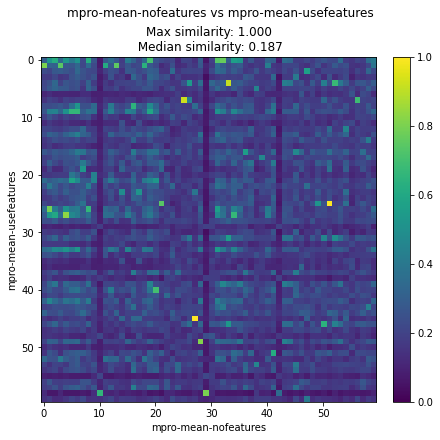

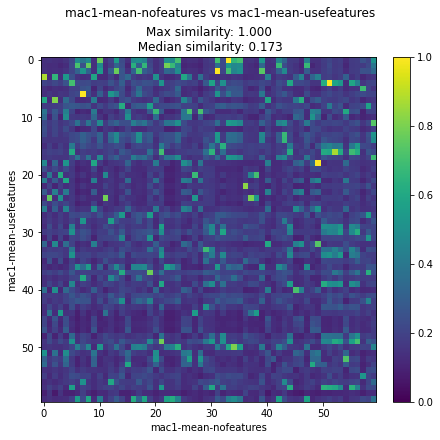

In [41]:
# target = 'mac1'
data_dir = '/rds-d7/project/rds-ZNFRY9wKoeE/EnamineREAL/topN/'

def picks(target, method, useFeatures=False, constrained=True):
    if constrained:
        con_str = '_constrained'
    else:
        con_str = ''

    if useFeatures:
        picks_df = pd.read_csv(data_dir+target+'_'+method+'_picks'+con_str+'.csv')
        display(HTML('<b>'+target+' butina '+method+' useFeatures'+con_str+'</b>'))
    else:
        picks_df = pd.read_csv(data_dir+target+'_'+method+'_noFeatures_picks'+con_str+'.csv')
        display(HTML('<b>'+target+' butina '+method+' NoFeatures'+con_str+'</b>'))
    
    picks_df['mol'] = [Chem.MolFromSmiles(smi) for smi in picks_df["smiles"]]
    picks_df['fps'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
        m, 2, 2048, useFeatures=useFeatures) for m in picks_df['mol']] # pharmacophore fingerprint

    
    # grid = mols2grid.display(picks_df, template="pages", smiles_col='smiles', mol_col='mol',
    #                 n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'],
    #                 maxMols=60, size=(300, 150), selection=True)
    return picks_df #, grid

def plot_tanimoto_features(target, method, ax1, ax2, useFeatures=False, constrained=False):
    if constrained:
        con_str = '_constrained'
    else:
        con_str = ''
    df1 = pd.read_csv(data_dir+target+'_'+method+'_picks'+con_str+'.csv')
    df2 = pd.read_csv(data_dir+target+'_'+method+'_noFeatures_picks'+con_str+'.csv')  

    fps1 = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
        Chem.MolFromSmiles(smi), 2, 2048, useFeatures=useFeatures) for smi in df1['smiles']]
    fps2 = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
        Chem.MolFromSmiles(smi), 2, 2048, useFeatures=useFeatures) for smi in df2['smiles']]

    sim_mat = np.empty((len(fps1), len(fps2)))
    for i in range(len(fps1)):
        sim_mat[i] = np.array(
            DataStructs.BulkTanimotoSimilarity(fps1[i], fps2))

    fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
    fig.suptitle(ax1+' vs '+ax2)
    cax = ax.matshow(sim_mat, aspect="auto", vmin=0, vmax=1)
    ax.set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
        np.amax(sim_mat),
        np.median(sim_mat)))

    ax.set_xlabel(ax1)
    ax.set_ylabel(ax2)
    ax.xaxis.set_ticks_position('bottom')
    fig.colorbar(cax)


# MPRO
mpro_picks = picks('mpro', 'mean', useFeatures=True)
grid = mols2grid.display(mpro_picks, template="pages", smiles_col='smiles', mol_col='mol',
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'],
                  maxMols=60, size=(300, 150), selection=False)
display(grid)

# display(picks('mpro', 'mean', useFeatures=True))
plot_tanimoto_features('mpro', 'mean',
    ax1='mpro-mean-nofeatures',
    ax2='mpro-mean-usefeatures', constrained=True)

# display(picks('mpro', 'nonan'))
# display(picks('mpro', 'nonan', useFeatures=True))
# plot_tanimoto_features('mpro', 'nonan',
#                        ax1='mpro-nonan-nofeatures',
#                        ax2='mpro-nonan-usefeatures')

# # MAC-1
mac1_picks = picks('mac1', 'mean', useFeatures=True)
grid = mols2grid.display(mac1_picks, template="pages", smiles_col='smiles', mol_col='mol',
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'],
                  maxMols=60, size=(300, 150), selection=False)
display(grid)
# display(picks('mac1', 'mean', useFeatures=True))
plot_tanimoto_features('mac1', 'mean',
                       ax1='mac1-mean-nofeatures',
                       ax2='mac1-mean-usefeatures', constrained=True)

# display(picks('mac1', 'nonan'))
# display(picks('mac1', 'nonan', useFeatures=True))
# plot_tanimoto_features('mac1', 'nonan',
#                        ax1='mac1-nonan-nofeatures',
#                        ax2='mac1-nonan-usefeatures')


# Clustering

# Atom Alchemy

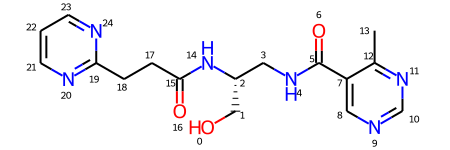

1


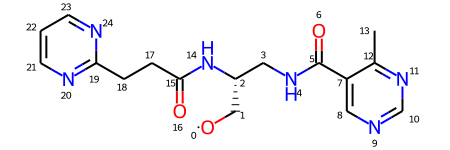

0
can't convert negative value to unsigned int
1


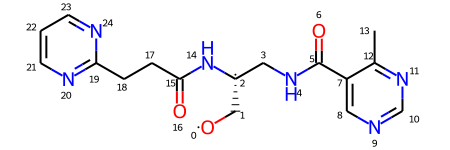

0
can't convert negative value to unsigned int
1


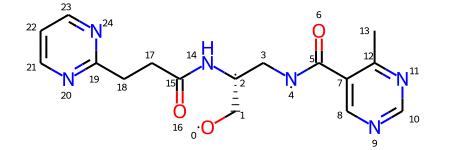

0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
1


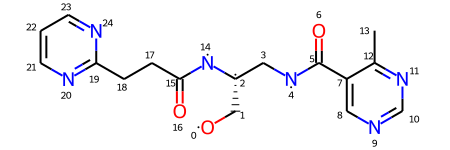

0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int
0
can't convert negative value to unsigned int


In [75]:
picks_df = pd.read_csv(data_dir+'mpro_mean_picks.csv')
# mol = Chem.AddHs(Chem.MolFromSmiles(picks_df["smiles"].values[0]))
mol = Chem.RemoveHs(Chem.MolFromSmiles(picks_df["smiles"].values[0]))

display(mol)

atoms = mol.GetAtoms()
for atom_idx in range(len(atoms)):
    try:
        n_hs = atoms[atom_idx].GetNumExplicitHs()
        print(n_hs)
        atoms[atom_idx].SetNumExplicitHs(n_hs-1)
        atoms[atom_idx].SetNumRadicalElectrons(1)
        display(mol)
    except Exception as ex:
        print(ex)
        continue
    #  bond = atom.GetBonds()


((0,), (3,))


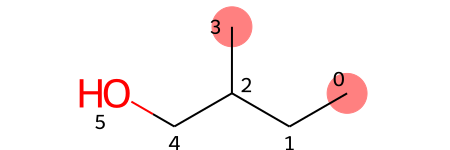

((<rdkit.Chem.rdchem.Mol object at 0x2b9d07528870>,), (<rdkit.Chem.rdchem.Mol object at 0x2b9d07525150>,))
(False, [], [])


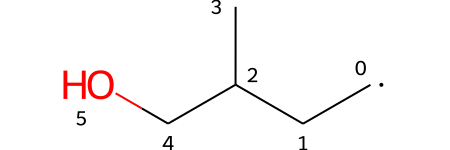

(False, [], [])


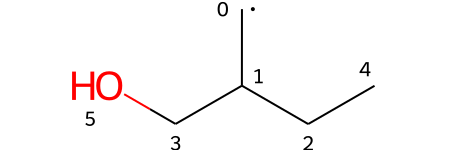

In [95]:
def is_rxn_v2(parent_mol, rxn, product_mol):
    ps = rxn.RunReactants([parent_mol])
    valid_ps = []
    side_ps = []
    for item in ps:
        if item[0].HasSubstructMatch(product_mol) and product_mol.HasSubstructMatch(item[0]):
            # can be multiple in the case of identical reactive sites.
            valid_ps.append(item[0])
        else:
            side_ps.append(item[0])
    if valid_ps:
        return True, valid_ps, side_ps
    return False, [], []

test = Chem.MolFromSmiles('CCC(C)CO')
print(test.GetSubstructMatches(Chem.MolFromSmarts('[CH3]')))
display(test)
# display(mol_with_atom_index(test))
# prods = Chem.ReplaceSubstructs(test, Chem.MolFromSmarts(
#     '[CH3]'), Chem.MolFromSmarts('[CH2]'))
rxn = Chem.rdChemReactions.ReactionFromSmarts('[CH3:1]>>[CH2:1]')

rxn = Chem.AllChem.ReactionFromSmarts('[CH3:1]>>[CH2:1]')

prods = rxn.RunReactants([test])
print(prods)
for prod in prods:
    Chem.rdmolops.AssignRadicals(prod[0])
    # prod[0].UpdatePropertyCache()
    # display(prod)
    rxn_class, prod_out, side_p = is_rxn_v2(test, rxn, prod[0])
    print(is_rxn_v2(test, rxn, prod[0]))
    # rxns
    display(prod[0])


# More efficient GetTanimotoDistMat

In [7]:
from rdkit.ML.Cluster.Butina import ClusterData

thresh = 0.4  # elements within this range of each other are considered to be neighbors ; max distance = 0.6?

d_mat_mpro = np.load('dmat_mpro_old.npy')
clusters_mpro = ClusterData(d_mat_mpro, nPts=len(
    df_mpro), isDistData=True, distThresh=0.4, reordering=True)
print('Number of Mpro clusters: {} (from {} mols)'.format(len(clusters_mpro), len(df_mpro)))

df_mpro.reset_index(drop=True, inplace=True)
butina_mpro_df = df_mpro.iloc[[clusters_mpro[n][0] for n in range(60)]]
butina_mpro_df['membership'] = [len(clusters_mpro[n]) for n in range(60)]

display(HTML('<b>Mpro Butina</b>'))
mols2grid.display(butina_mpro_df, template="pages", smiles_col='smiles', mol_col='mol',
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'],
                  maxMols=60, size=(300, 150), selection=False)

# d_mat_mac1 = np.load('dmat_mac1_old.npy')
# clusters_mac1 = ClusterData(d_mat_mac1, nPts=len(
#     df_mac1), isDistData=True, distThresh=0.4, reordering=True)
# print('Number of Mac-1 clusters: {} (from {} mols)'.format(len(clusters_mac1), len(df_mac1)))

# df_mac1.reset_index(drop=True, inplace=True)
# butina_mac1_df = df_mac1.iloc[[clusters_mac1[n][0] for n in range(60)]]

# display(HTML('<b>Mac-1 Butina</b>'))
# mols2grid.display(butina_mac1_df, template="pages", smiles_col='smiles', mol_col='mol',
#                   n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'],
#                   maxMols=60, size=(300, 150), selection=False)


Number of Mpro clusters: 4047 (from 25184 mols)


/rds-d2/user/wjm41/hpc-work/conda/envs/felix_md/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# butina_mols = [df_mpro['mol'].values[clusters_mpro[n][0]] for n in range(5)]
# butina_fps = [df_mpro['fps'].values[clusters_mpro[n][0]] for n in range(5)]

df_mpro.reset_index(drop=True, inplace=True)
butina_mpro_df = df_mpro.iloc[[clusters_mpro[n][0] for n in range(60)]]
butina_mpro_df['membership'] = [len(clusters_mpro[n]) for n in range(60)]

# butina_vs_maxmin = np.empty((len(butina_fps), len(maxmin_fps)))
# for i in range(len(butina_fps)):
#     butina_vs_maxmin[i] = np.array(
#         DataStructs.BulkTanimotoSimilarity(butina_fps[i], maxmin_fps))

# fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
# fig.suptitle('Butina vs MaxMin')
# cax = ax.matshow(butina_vs_maxmin, aspect="auto", vmin=0, vmax=1)
# ax.set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
#     np.amax(butina_vs_maxmin[~np.eye(butina_vs_maxmin.shape[0], dtype=bool)]),
#     np.median(butina_vs_maxmin[~np.eye(butina_vs_maxmin.shape[0], dtype=bool)])))
# ax.xaxis.set_ticks_position('bottom')
# fig.colorbar(cax)
# plt.show()
display(HTML('<b>Mpro Butina</b>'))
mols2grid.display(butina_mpro_df, template="pages", smiles_col='smiles', mol_col='mol',
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles', 'membership'], 
                 maxMols=60, size=(300, 150), selection=False)


In [11]:
help(mols2grid.MolGrid.to_table)

Help on function to_table in module mols2grid.molgrid:

to_table(self, subset=None, tooltip=None, n_cols=6, cell_width=160, border='1px solid #cccccc', gap=0, fontsize='12pt', fontfamily="'DejaVu', sans-serif", textalign='center', tooltip_fmt='<strong>{key}</strong>: {value}', tooltip_trigger='click hover', tooltip_placement='bottom', hover_color='#e7e7e7', style=None)
    Returns the HTML document for the "table" template
    
    Parameters
    ----------
    subset : list or None
        Columns to be displayed in each cell of the grid. Each
        column's value will be displayed from top to bottom in the same
        order given here. Use `"img"` for the image of the molecule.
        Default: all columns (with "img" in first position)
    tooltip : list or None
        Columns to be displayed as a tooltip when hovering/clicking on the
        image of a cell. Use `None` for no tooltip.
    tooltip_fmt : str
        Format string of each key/value pair in the tooltip
    tooltip_

In [ ]:
df_mac1.reset_index(drop=True, inplace=True)
butina_mac1_df = df_mac1.iloc[[clusters_mac1[n][0] for n in range(60)]]

display(HTML('<b>Mac-1 Butina</b>'))
mols2grid.display(butina_mac1_df, template="table", smiles_col='smiles', mol_col='mol',
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['smiles'], maxMols=60, size=(300, 150))


In [ ]:
import pickle 

data_dir = '/home/wjm41/ml_physics/frag-pcore-screen/data/Mpro'
frags = pickle.load(open(data_dir + '/frags_mpro.pickle', 'rb'))
frag_mols = [Chem.RemoveHs(frag[0]) for frag in frags]
frag_fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
    m, 2, 2048) for m in frag_mols]

display(HTML('<b>Fragments</b>'))
mols2grid.display(frag_mols, template='table', coordGen=True, use_coords=False, maxMols=len(frag_mols))


Error: Session cannot generate requests

In [67]:
df['frag_sim_score'] = [np.mean((DataStructs.BulkTanimotoSimilarity(
    df['fps'].values[i], frag_fps))) for i in range(len(df))]
# # print(df['frag_sim_score'])
mols = [mol for mol in df.nlargest(n=60, columns='frag_sim_score')['mol'].values]
# # print(df.nlargest(n=60, columns='frag_sim_score')[
# #     'mol'].values)
# for mol in df.nlargest(n=60, columns='frag_sim_score')['mol'].values:
#     print(type(mol))
mols2grid.display(mols, template='table', n_rows=15, n_cols=4, subset=["img"], tooltip=['SMILES'], maxMols=60, size=(300, 150))


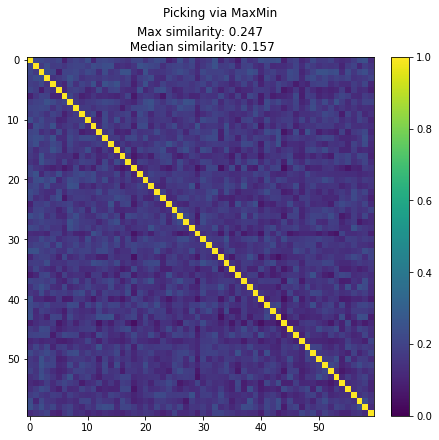

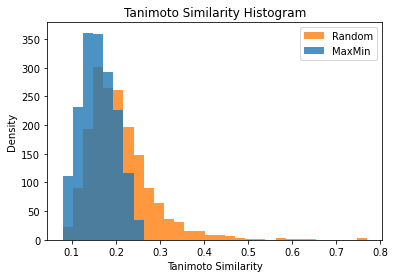

In [5]:
from rdkit.SimDivFilters import rdSimDivPickers
lp = rdSimDivPickers.LeaderPicker()

thresh = 0.75 # <- minimum distance between cluster centroids
picks = lp.LazyBitVectorPick(df['fps'].values, len(df), thresh, pickSize=60)
# print('Number of mols picked: {}'.format(len(picks)))

maxmin_mols = [df['mol'].values[x] for x in picks]
maxmin_fps = [df['fps'].values[x] for x in picks]

maxmin_mat = np.empty((len(maxmin_fps), len(maxmin_fps)))
for i in range(len(maxmin_fps)):
    maxmin_mat[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(maxmin_fps[i], maxmin_fps))

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
fig.suptitle('Picking via MaxMin')
cax = ax.matshow(maxmin_mat, aspect="auto", vmin=0, vmax=1)
ax.set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(maxmin_mat[~np.eye(maxmin_mat.shape[0], dtype=bool)]),
    np.median(maxmin_mat[~np.eye(maxmin_mat.shape[0], dtype=bool)])))
ax.xaxis.set_ticks_position('bottom')
fig.colorbar(cax)
plt.show()

fig = plt.figure()
mask = np.tri(maxmin_mat.shape[0], k=-1)  # masks the lower triangle
maxmin_masked = np.ma.array(maxmin_mat, mask=mask)
plt.title('Tanimoto Similarity Histogram')
_, bins, _ = plt.hist(rand_mat[rand_masked.mask].flatten(),
         bins=30, label='Random', alpha=0.8, color=cmap(1))  # only choose the lower triangle
plt.hist(maxmin_mat[maxmin_masked.mask].flatten(),
         bins=bins, label='MaxMin', alpha=0.8, color=cmap(0))  # only choose the lower triangle
plt.legend(loc='upper right')

plt.xlabel('Tanimoto Similarity')
plt.ylabel('Density')
plt.show()

display(HTML("<h3>MaxMin</h3>"))
mols2grid.display(maxmin_mols, template="table",
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['SMILES'], maxMols=60, size=(300, 150))


In [4]:

ward = HierarchicalClusterPicker(ClusterMethod.CLINK)
ids = ward.Pick(d_mat, len(df['mol'].values), 60)

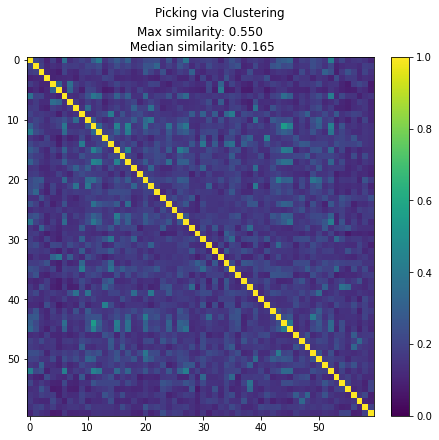

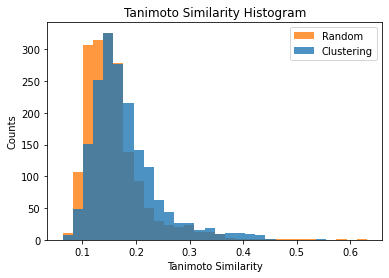

In [6]:
import mols2grid

ward_mols = [df['mol'].values[x] for x in ids]
ward_fps = [df['fps'].values[x] for x in ids]

ward_mat = np.empty((len(ward_fps), len(ward_fps)))
for i in range(len(ward_fps)):
    ward_mat[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(ward_fps[i], ward_fps))

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
fig.suptitle('Picking via Clustering')
cax = ax.matshow(ward_mat, aspect="auto", vmin=0, vmax=1)
ax.set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(ward_mat[~np.eye(ward_mat.shape[0], dtype=bool)]),
    np.median(ward_mat[~np.eye(ward_mat.shape[0], dtype=bool)])))
ax.xaxis.set_ticks_position('bottom')
fig.colorbar(cax)

fig = plt.figure()
mask = np.tri(ward_mat.shape[0], k=-1)  # masks the lower triangle
ward_masked = np.ma.array(ward_mat, mask=mask)
plt.title('Clustering')
plt.title('Tanimoto Similarity Histogram')
_, bins, _ = plt.hist(rand_mat[rand_masked.mask].flatten(),
                      bins=30, label='Random', alpha=0.8, color=cmap(1))  # only choose the lower triangle
plt.hist(ward_mat[ward_masked.mask].flatten(),
         bins=bins, label='Clustering', alpha=0.8, color=cmap(0))  # only choose the lower triangle
plt.legend(loc='upper right')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Counts')
plt.show()

display(HTML("<h3>Clustering</h3>"))
mols2grid.display([df['mol'].values[x] for x in ids], template="table",
                  n_rows=15, n_cols=4, subset=["img"], tooltip=['SMILES'], maxMols=60, size=(300, 150))


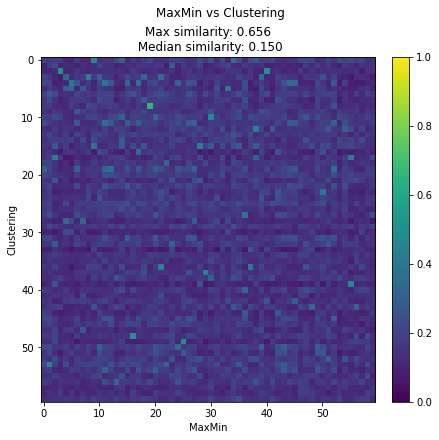

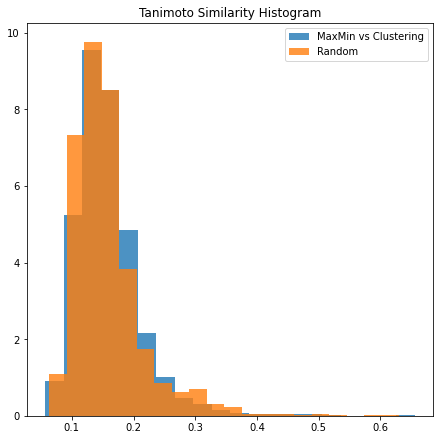

In [9]:
comp_mat = np.empty((len(maxmin_fps), len(ward_fps)))
for i in range(len(maxmin_fps)):
    comp_mat[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(maxmin_fps[i], ward_fps))

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
fig.suptitle('MaxMin vs Clustering')
cax = ax.matshow(comp_mat, aspect="auto", vmin=0, vmax=1)
ax.set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(comp_mat),
    np.median(comp_mat)))

ax.set_xlabel('MaxMin')
ax.set_ylabel('Clustering')
ax.xaxis.set_ticks_position('bottom')
fig.colorbar(cax)

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax.set_title('Tanimoto Similarity Histogram')
ax.hist(comp_mat.flatten(),
        bins=20, density=True, label='MaxMin vs Clustering', alpha=0.8)  # only choose the lower triangle

ax.hist(rand_mat[rand_masked.mask].flatten(),
            bins=20, density=True, label='Random', alpha=0.8)  # only choose the lower triangle
plt.legend(loc='upper right')
plt.show()

# top_n = len(comp_mat[comp_mat==1])

# max_inds = np.unravel_index(np.argpartition(
#     comp_mat.flatten(), -top_n)[-top_n:], shape=(comp_mat.shape))

# x = max_inds[0]
# y = max_inds[1]

# mols2grid.display([ward_mols[i] for i in y],
#                   size=(300, 150), subset=["img"], tooltip=['SMILES'], template='table')


In [13]:
data_dir = '/rds-d7/project/rds-ZNFRY9wKoeE/EnamineREAL/data/'

pd.DataFrame(smi, columns=['smiles']).to_csv(data_dir+'../topN/'+target+'_picks.csv', index=False)


NameError: name 'smi' is not defined

# Visualise Picks

In [46]:
def return_picks(target):
    data_dir = '/rds-d7/project/rds-ZNFRY9wKoeE/EnamineREAL/data/'

    df = pd.read_csv(data_dir+'../topN/topN_new_filtered_' + target+'.csv')
    print('No. of mols before alert filtering: {}'.format(len(df)))

    df['mol'] = [Chem.MolFromSmiles(smi) for smi in df["smiles"]]
    df["alerts"] = df['mol'].apply(search_alerts)

    df = df[~df["alerts"]].reset_index()
    print('No. of mols after alert filtering: {}'.format(len(df)))

    df['fps'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
        m, 2, 2048) for m in df['mol']]

    lp = rdSimDivPickers.LeaderPicker()

    thresh = 0.75  # <- minimum distance between cluster centroids
    picks = lp.LazyBitVectorPick(df['fps'].values, len(df), thresh, pickSize=60)
    # print('Number of mols picked: {}'.format(len(picks)))

    picked_df = df.iloc[picks]

    return picked_df

mpro_picks = return_picks('mpro')
mac1_picks = return_picks('mac1')
dpp11_picks = return_picks('dpp11')

No. of mols before alert filtering: 30902
No. of mols after alert filtering: 25184
No. of mols before alert filtering: 50000
No. of mols after alert filtering: 46666
No. of mols before alert filtering: 50000
No. of mols after alert filtering: 43763


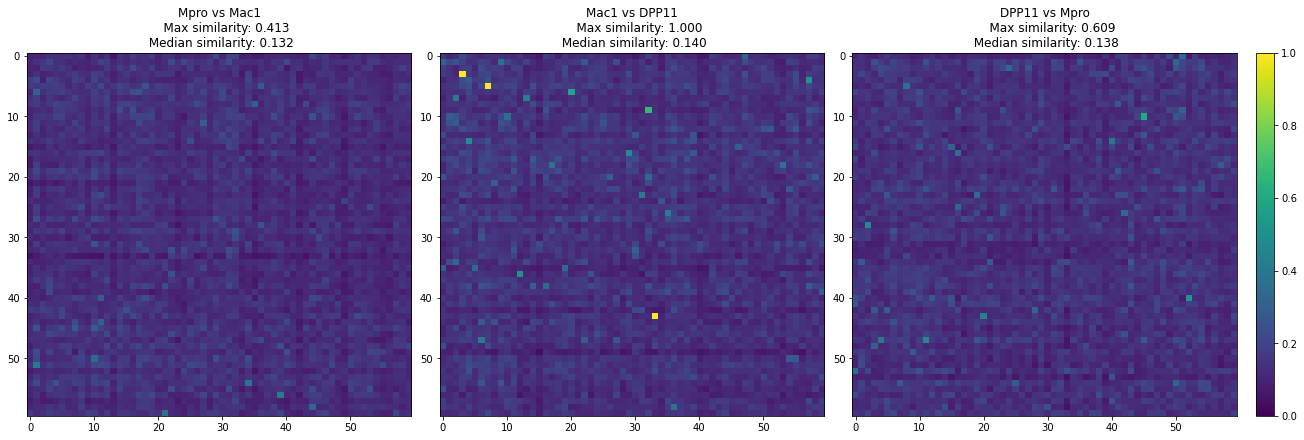

In [67]:
mpro_vs_mac1 = np.empty((len(mpro_picks['fps']), len(mac1_picks['fps'])))
for i in range(len(mpro_picks['fps'])):
    mpro_vs_mac1[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(mpro_picks['fps'].values[i], mac1_picks['fps'].values))

mac1_vs_dpp11 = np.empty((len(mac1_picks['fps']), len(dpp11_picks['fps'])))
for i in range(len(mac1_picks['fps'])):
    mac1_vs_dpp11[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(mac1_picks['fps'].values[i], dpp11_picks['fps'].values))

dpp11_vs_mpro = np.empty((len(dpp11_picks['fps']), len(mpro_picks['fps'])))
for i in range(len(dpp11_picks['fps'])):
    dpp11_vs_mpro[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(dpp11_picks['fps'].values[i], mpro_picks['fps'].values))

fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, constrained_layout=True)
# fig.suptitle('Comparing picked molecules')
cax = axs[0].matshow(mpro_vs_mac1, aspect="auto", vmin=0, vmax=1)
axs[0].set_title('Mpro vs Mac1\n\
    Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(mpro_vs_mac1),
    np.median(mpro_vs_mac1)))
axs[0].xaxis.set_ticks_position('bottom')
# fig.colorbar(cax)

cax = axs[1].matshow(mac1_vs_dpp11, aspect="auto", vmin=0, vmax=1)
axs[1].set_title('Mac1 vs DPP11\n\
    Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(mac1_vs_dpp11),
    np.median(mac1_vs_dpp11)))
axs[1].xaxis.set_ticks_position('bottom')
# fig.colorbar(cax)

cax = axs[2].matshow(dpp11_vs_mpro, aspect="auto", vmin=0, vmax=1)
axs[2].set_title('DPP11 vs Mpro\n\
    Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(dpp11_vs_mpro),
    np.median(dpp11_vs_mpro)))
axs[2].xaxis.set_ticks_position('bottom')
fig.colorbar(cax)
